# Diferencias Finitas y Método de Euler

## Librerias

In [5]:
import numpy as np
import matplotlib.pyplot as plt

##  Ecuación a Resolver
Dada la ecuación diferencial ordinaria:

$$
\frac{du}{dt} = u, \quad u(0) = 1, \quad 0 \leq t \leq 4
$$

Esta ecuación tiene una solución analítica:

$$
u(t) = e^t
$$

Sin embargo, podemos resolverla numéricamente usando diferencias finitas.

## Método de Euler
El método de Euler se basa en la discretización del tiempo. Se aproxima la derivada como:

$$
\frac{u(t_{n+1}) - u(t_n)}{\Delta t} = u(t_n)
$$

Despejamos $ u(t_{n+1}) $:

$$
u(t_{n+1}) = (1 + \Delta t) u(t_n)
$$

## Implementación Computacional

In [ ]:
def euler_method(u0, dt, t_max):
    
    t_values = np.arange(0, t_max + dt, dt)  # Genera valores de tiempo desde 0 hasta t_max con paso dt
    u_values = np.zeros_like(t_values)  # Inicializa una lista de ceros para los valores de u(t)
    u_values[0] = u0  # Asigna la condición inicial

    for n in range(len(t_values) - 1):  # Itera hasta el último valor de tiempo
        u_values[n + 1] = (1 + dt) * u_values[n]  # Aplica la fórmula de Euler

    return t_values, u_values


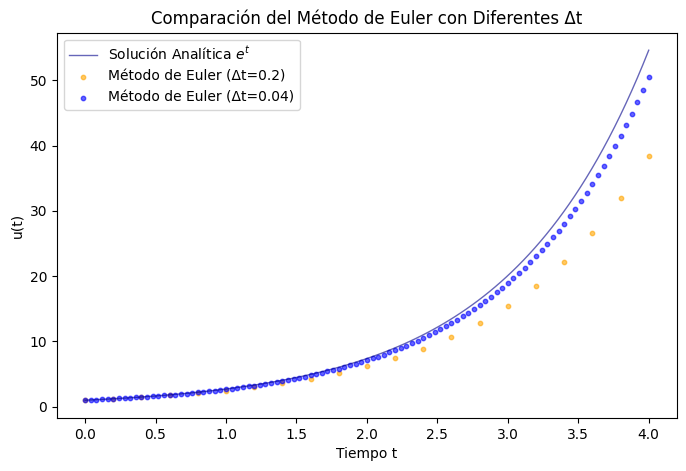

In [51]:
#Condiciones nuestro problrmeas 
u0 = 1  # Condición inicial u(0) = 1
dt_values = [0.2, 0.04]  
t_max = 4  # Tiempo final

# Solución analítica
t_exact = np.linspace(0, t_max, 100)  # Valores continuos de tiempo
u_exact = np.exp(t_exact)  # u(t) = e^t

# Solución numérica vs solución analítica
plt.figure(figsize=(8,5))
plt.plot(t_exact, u_exact, linewidth=1, alpha=0.6, label="Solución Analítica $e^t$",color='darkblue')  

colors = ['orange', 'blue']  
for i, dt in enumerate(dt_values):
    t_values, u_values = euler_method(u0, dt, t_max)
    plt.scatter(t_values, u_values, s=10, color=colors[i], label=f"Método de Euler (Δt={dt})", alpha=0.6)

plt.xlabel("Tiempo t")
plt.ylabel("u(t)")
plt.title("Comparación del Método de Euler con Diferentes Δt")
plt.legend()
plt.show()

## Comparación con la Solución Analítica
Para comparar el método de Euler con la solución exacta:

- Cuanto más pequeño sea $Delta t$, mejor será la aproximación.
- Un $Delta t$ más grande introduce mayor error pero reduce el costo computacional.

# Diferencias Finitas Segundo Ordenar

In [38]:
def diferencias_finitas(N, u0, u1, f_value=5):
    """
    Resuelve la ecuación diferencial d²u/dx² = f_value con condiciones de frontera u(0) = u0 y u(1) = u1
    usando el método de diferencias finitas.

    Parámetros:
    - N: Número de puntos internos en el mallado.
    - u0: Valor de la condición de frontera en x=0.
    - u1: Valor de la condición de frontera en x=1.
    - f_value: Valor de la función en el lado derecho de la ecuación (por defecto 5)..
    """

    
    dx = 1 / (N + 1)  # Calcular el valor Ax
    x_values = np.linspace(0, 1, N + 2)  # Incluir los puntos de frontera sumandole dos

    # A y B
    A = np.zeros((N + 2, N + 2))
    B = np.zeros(N + 2)

    #Condiciones de frontera
    A[0, 0] = 1
    B[0] = u0
    A[-1, -1] = 1
    B[-1] = u1

    # Rellenar A y vector B usando diferencias finitas
    for i in range(1, N + 1):
        A[i, i - 1] = 1 / dx**2
        A[i, i] = -2 / dx**2
        A[i, i + 1] = 1 / dx**2
        B[i] = f_value

    # Resolver el sistema 
    u_numerica = np.linalg.solve(A, B)
    return x_values, u_numerica

In [39]:
def solucion_analitica(x):
    return (5/2) * x**2 - (3/2) * x + 1

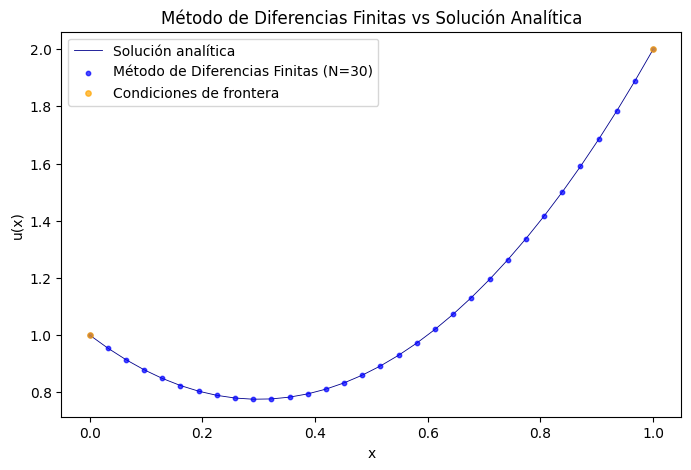

In [61]:
# Parámetros del problema
N = 30  # Num ptos
u0 = 1  # Condición de frontera en x=0
u1 = 2  # Condición de frontera en x=1

#Diferencias finitas
x_values, u_numerica = diferencias_finitas(N, u0, u1)
# Solución analítica en los mismos puntos
u_analitica = solucion_analitica(x_values)

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(x_values, u_analitica, label="Solución analítica", color='darkblue', linewidth=0.6)
plt.scatter(x_values, u_numerica, color='blue', s=10, label=f"Método de Diferencias Finitas (N={N})", zorder=3,alpha=0.7)
plt.scatter([x_values[0], x_values[-1]], [u0, u1], color='orange', s=15, label="Condiciones de frontera", zorder=4,alpha=0.7)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Método de Diferencias Finitas vs Solución Analítica")
plt.legend()
plt.show()

## Ejercicios Tema 3

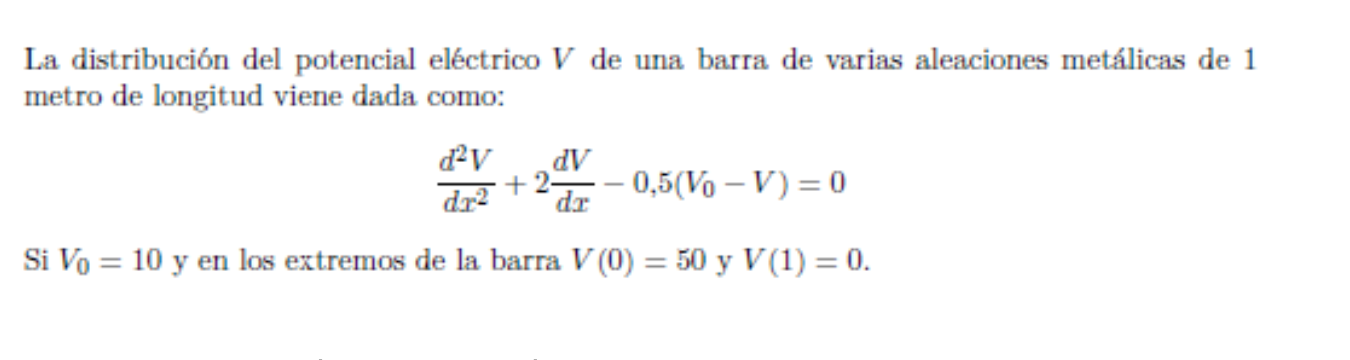